In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from skopt.plots import plot_gaussian_process


In [187]:
x, y = np.meshgrid(np.linspace(0,150,100), np.linspace(0,150,100))

In [188]:
def multivariate_gaussian(pos, mu, Sigma):

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [189]:
grid = np.empty(x.shape + (2,))

grid[:,:,0] = x
grid[:,:,1] = y

In [190]:
gaussians = [([50,50],[[600,25],[-90,110]]),
             ([90,30],[[700,-15],[-105,40]]),
             ([80,90],[[120,-25],[90,42]]),
             ([20,80],[[100,-25],[-55,400]]),
]

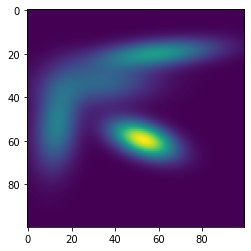

In [191]:
plt.imshow(np.sum([multivariate_gaussian(grid, np.array(mu), np.array(sig)) for mu, sig in gaussians], axis=0))

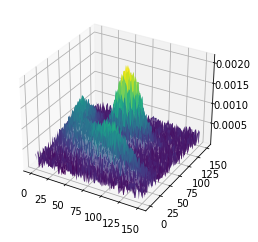

In [192]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(x,y, np.sum([multivariate_gaussian(grid, np.array(mu), np.array(sig)) for mu, sig in gaussians] + 1e-4*np.random.random((100,100)), axis=0), cmap=cm.viridis)
#fig.colorbar(surf, shrink = 0.5, aspect = )